Medvirkende: Hedda Bjørnstad, Julie Marie Ervik og Kristin Fullu

# Damptrykk for ${H_2O}$

## Innledning

En damptrykkurve er en fremstilling av forholdet mellom væske og gassfasen til et stoff for ulike trykk og temperaturer. To viktige punkter på en damptrykkurve er trippelpunktet og det kritiske punktet. Trippelpunktet forteller ved hvilket trykk og hvilken temperatur stoffets tre faser kan eksistere samtidig. Det kritiske punktet forteller oss at dersom trykket og temperaturen sammen stiger videre fra punktet, forsvinner forskjellen mellom væske og gass. I dette prosjektet skal vi arbeide med damptrykkurven for vann der trippelpunktet ved $273.1600K$ og det krisitke punktet ved $647.096K$. Disse verdiene vil representere start og sluttverdi på $p(T)$ plottene.

Prosjektet kommer også til å ta for seg et trykk-volum diagram, ofte beskrevet som $pV$-diagram. Et 2D $pV$-diagram viser sammenhengen mellom trykk og volum ved en konstant temperatur, og har ulike områder som beskriver hvilke ulike stadier av vannet som kan eksistere ved det trykket og volumet. 

Gjennom prosjektet skal vi benytte ulike numeriske metoder for å gjøre tilnærminger. Den første numeriske metoden som brukes er Newtons metode for både en og to ukjente. Gjennom en iterativ prosess finner metoden en stadig bedre tilnærmelse til et nullpunkt av den gitte funksjonen, noe som tilsier at funksjonen som skal løses er på formen  $f(x)=0$. Metoden kan ved hjelp av en Jacobi-matrise løse ligningssystemer. Den andre metoden, Simpsons metode, er en numerisk integrasjonsmetode som deler opp integrasjonsintervallet i flere delintervall, og approksimerer funksjonen i hvert delintervall. For å forsikre oss om at metodene virker vil det hentes inn eksperimentelle verdier fra EngineeringToolbox (1) som de utregnede verdiene kan sammenlignes med.

Målet for prosjektet er å bli kjent med ulike formler som van der Waals tilstandsligning og Clapeyrons ligning, og forstå hvorfor kjente metoder og ligninger av og til ikke er de beste tilnærmingene av faktiske forhold. Vi skal i tillegg se på avvik menllom eksperimentelle verdier og tilnærmingene.

## Motivasjon



Alle de medvirkende i prosjektet har tidligere hatt emnet TFY4165 - Termisk fysikk, og har derfor jobbet en del med både ideell gasslov og van der Waals tilstandsligning. Dette arbeidet var derimot kun teoretisk, og innebar mange forenklinger og neglisjeringer av faktiske forhold. Det kom derfor noe som en overraskelse da vi gjennom prosjektets innledning forsto at resultater fra bruk av van der Waals tilstandsligning ikke ligner eksperimentelle verdier. Her innså vi dermed viktigheten av mer nøyaktige og virkelighetsnære metoder, og hvorfor det er viktig å benytte og forstå disse.

De to oppgavene i prosjektet har som endelig mål å konstruere et pV-fasediagram og et p(T)-diagram som sammenligner de ulike metodene vi har benyttet. Begge disse diagrammene er viktige verktøy innenfor arbeid med termofysikk.

Et pV-diagram er blant annet nyttig for arbeid med termodynamiske systemer som for eksempel kjølesystemer (4). Diagrammet kan gi innsikt i hvordan systemet fungerer og hvordan man kan optimalisere det. Det er også viktig for å unngå å havne i situasjoner hvor vannet ender i en uønsket fase fordi kombinasjonen av trykk og volum ikke er tatt nok hensyn til. Et pT-diagram vil være like viktig i de samme situasjonene som et pV-diagram, og benyttes sammen med pV-diagram for å passe på at system holder de ønskede fasene.

Den enkleste og kanskje mest brukte formelen for å regne ut trykk gitt volum og temperatur, er ideell gasslov, gitt ved $$pV = nRT.$$ Van der Waals tilstandsligning, $$p = \frac{RT}{V-b}-\frac{a}{V^2},$$ er en videreutvikling av denne som tar hensyn til interaksjonene mellom gassmolekylene ved hjelp av sine korreksjonsfaktorer. Som nevnt er begge disse formlene likevel ikke veldig virkelighetsnære, og er grunnen til at vi ønsker å bli kjent med Clapeyrons ligning, gitt ved $$\frac{dp}{dT}=\frac{L(T)}{T\Delta V(T)}.$$ Det er denne som vil gi de mest korrekte resultatene, og vil være bedre til å konstruere pV- og pT-diagram til bruk i industri.

Alt i alt forstår vi at pV- og pT-diagram er viktige hjelpemidler innenfor termofysikk, og et grundig arbeid og forståelse av konstruksjonen av dem er derfor nødvendig og viktig.

#### Importering av bibliotek


In [1]:
#Importerer bibliotekene vi trenger i oppgaven
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from numpy import genfromtxt
from scipy.interpolate import CubicSpline

## Oppgave 1

Den første oppgaven kommer til å dreie seg om van der Waals tilstandsligning, som er gitt ved $$p = \frac{RT}{V-b}-\frac{a}{V^2}.$$ Ligningen er som nevnt ikke særlig virkelighetsnær i mange tilfeller, og dette er noe vi kommer til å undersøke. Likevel kan den benyttes for å konstruere et relativt greit pV-diagram, noe som er siste mål i denne oppgaven.

### Oppgave 1 a)

For å kunne bruke van der Waals tilstandsligning må man bestemme parametrene a og b. Disse er konstante for et stoff, og kan regnes ut ved hjelp av bestemte verdier som tilhører det stoffet.

Fra side 4 i prosjektbeskrivelsen vet vi at $$ a = \frac{27R^2T_c^2}{64p_c}$$ og $$ b= \frac{RT_c}{8p_c}.$$ Vi har også fått oppgitt de eksperimentelle verdiene $T_c = 647.096 K$ , $p_c = 22.064 MPa$ og $V_c = 55.948 mL$ for $H_2O$. I tillegg har det blitt opplyst at vi skal bruke at gasskonstanten har verdien $R = 8.314 \frac{J}{mol K}$.

Ved å sette inn verdiene i uttrykkene for a og b får vi
$$a = 0.5534 \frac{J^{2}}{mol^{2}Pa}$$

$$b = 3.048\cdot 10^{-5} \frac{J}{molPa}.$$

Dette er verdiene som vil brukes i videre utregninger med van der Waals ligning.

Når et stoff når den kristiske temperaturen $T_c$ og det kritiske trykket $p_c$, opptar ett mol av stoffet det som er definert som det kritiske volumet, $V_c$. For van der Waals tilstandsligning gjelder formelen $V_c = 3b$. 

Med vår utregnede verdi for b, får vi at $$V_c = 91.44 \frac{mL}{mol}.$$ Dersom vi sammenligner denne verdien med den eksperimentelle verdien for kritisk volum, 
$V_{c} = 55.948 \frac{mL}{mol}$, ser vi et klart avvik. Dette skjer fordi van der Waals tilstandsligning kun er en forenklet modell laget for å beskrive noen oppførsler hos ideell gass. Modellen kan ikke ta hensyn til mer enn to termodynamiske variable av gangen, og svikter derfor ved utregningen av $V_c$ (5).


Det er også verdt å bemerke at ettersom $V_c$ er definert som volumet ett mol stoff opptar, er det egentlig overflødig å ha med $mol$ i enheten $\frac{mL}{mol}$.

In [2]:
# Samling av faste konstanter og variabler, og enkle omgjøringer
R = 8.314            #J/(mol K), gasskonstanten
a = 0.5534           #J^2/(mol^2*Pa)
b = 3.048*10**(-5)   #J/mol Pa
Tc = 647.096         #K, kritisk temperatur for vann
pc = 22.064*10**(6)  #Pa, kritisk trykk for vann

mL = 10**(-6)        #Ganger man med denne konverteres  mL til m^3, del for å gå andre veien
liter = 10**(-3)     #Ganger man med denne konverteres liter til m^3, del for å gå andre veien
bar = 10**(-5)       #Ganger man med denne konverteres pascal til bar, del for å gå andre veien

### Oppgave 1 b)


Med van der Waals tilstandsligning og dens konstanter som vi har funnet, kan vi regne ut trykket som en funksjon av volumet dersom vi holder temperaturen konstant og varierer volumet. Dette er nyttig å kunne bruke gjennom oppgave 1, spesielt når vi skal konstruere det ferdige p-V fasediagrammet i 1h). Vi plotter derfor $p(V)$ vha. van der Waals tilstandsligning, med $T = T_c$ og $V$ på intervallet $[75,300] mL$.

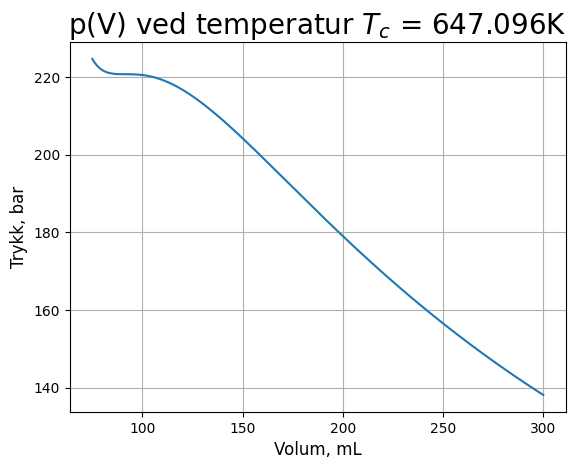

In [3]:
def vdwCriticalTemp(minV,maxV,numVolumes):
    '''
    Input: Første og siste volumverdi, og antall volumverdier vi ønsker
    Output: Array med trykket ved hvert volum, og et array av volumene
    '''
    volumes = np.linspace(minV,maxV,numVolumes+1) 
    p = (R*Tc)/(volumes-b)-a/(volumes**2)
    return p, volumes

pTc, vTc = vdwCriticalTemp(75*mL,300*mL,225)  # Ganger for å gjøre om fra mL til m^3

plt.plot(vTc/mL,pTc*bar) # Gjør om til mL og bar for å sammenligne med figur fra oppgavetekst
plt.title(f'p(V) ved temperatur $T_c$ = {Tc}K', fontsize=20)
plt.xlabel("Volum, mL", fontsize=12)
plt.ylabel("Trykk, bar", fontsize=12)
plt.grid()
plt.show()

Hovedforskjellen mellom vår isoterm og isotermen fra figur 2 i prosjektbeskrivelsen finner vi på venstre side av grafen. Her observerer vi et terrassepunkt, i motsetning til duppet som vi ser i prosjektbeskrivelsens isoterm. Dette duppet beskriver en ufysisk tilstand, ettersom det ikke er slik trykk- og volumsammenhengen oppfører seg i virkeligheten. I prosjektbeskrivelsens isoterm er det derfor tegnet inn en horisontale linje, og denne representerer en faseovergang. Denne gjelder derfor istedet for isotermkurven. Terrassepunktet vårt sier oss derfor at det ikke skjer en faseovergang, og grafen er derfor heller ikke ufysisk. At det ikke skjer en faseovergang gir mening ettersom vår isoterm er plottet ved $T_c$, hvor forskjellen mellom gass og væske forsvinner.

### Oppgave 1 c)

Dersom vi videre skal kunne finne damptrykk-kurven, er det viktig at vi har en god forståelse av metodene som brukes. Vi har derfor fått oppgitt en relativt enkel ligning med pen løsning å øve oss på. Selv om ligningen ikke omhandler damptrykk-kurver, tar den fortsatt for seg faseovergang og hva som skjer ved en kritisk temperatur. Ligningen er derfor både interessant og relevant å trene seg på. 

Ligningen vi skal trene oss på, er ligning 14 fra prosjektbeskrivelsen, gitt ved 
$$
sinh^2(\frac{2c}{T_c}) = 1.
$$ Denne beskriver en Ising-modells faseovergang fra uordnet til ordnet tilstand ved kritisk temperatur. Løsningen er gitt i ligning 15 i prosjektbeskrivelsen, $$T_c = \frac{2c}{\ln(1+\sqrt2)}.$$

In [4]:
# Setter uttrykket i ligning 14 lik 0
def eq14(t):    
    return (np.sinh((2)/t)**2) - 1

# Den deriverte av ligning 14
def eq14Der(t): 
    return -(np.cosh(2/t)*4*np.sinh(2/t))/t**2

# Den eksakte løsningen til ligning 14
eq15 = 2/(np.log(1+np.sqrt(2))) 

In [5]:
def newton(x0, f , fDer, maxIter, tol):
    '''
    Input: Første gjett, funksjonen som skal løses, den deriverte av funksjonen, 
    maks antall iterasjoner før koden stopper, og toleransen for når endringen blir liten nok
    Output: Kodens tilnærminger til løsningen
    '''
 
    x = np.zeros(maxIter)      # Lager et array vi kan fylle med løsningstilnærminger for hver iterasjon
    iArray = np.zeros(maxIter) # Lager et array å lagre antall iterasjoner i i
    x[0] = x0                  # Setter første tilnærming til å være opprinnelig gjett
    i = 0

    '''Kjører en while-løkke som breaker hvis forskjellen mellom nåværende gjett og forrige gjett blir mindre enn toleransen,
    eller hvis antall iterasjoner overgår det vi har satt som maks antall iterasjoner'''
    while ((np.abs(x[i] - x[i-1]) > tol) and (i < maxIter-1)): 
        x[i+1] = x[i] - f(x[i])/fDer(x[i]) # Regner ut neste gjett vha. ligning 19 fra appendiksen
        i += 1
        iArray[i] = i       
            
    return x[:i] , iArray[:i]

initGuess14 = 1
maxIter = 600
tol = 6e-10
newtonGuess14, iter14 = newton(initGuess14,eq14,eq14Der,maxIter,tol)

print(f'Med Newtons metode blir funksjonsverdien regnet til å være {newtonGuess14[-1]}')
print(f'Den eksakte løsningen er {eq15}')

Med Newtons metode blir funksjonsverdien regnet til å være 2.26918531421302
Den eksakte løsningen er 2.269185314213022


Vi ser at Newtons metode gir oss nesten nøyaktig det samme som den eksakte løsningen, og vi har derfor fått sjekket at Newtons metode er implementert riktig. Dette gjør det enklere å skulle bruke metoden senere. Dersom vi skulle ha implementert metoden og brukt den til å løse et ukjent problem samtidig hadde det trolig ført til lengre tidsbruk. 

### Oppgave 1 d)

Ulike numeriske metoder for tilnærming av nullpunkt for en funksjon vil konvergere på ulike måter, og det kan være interessant å se forskjellen mellom disse, og i tillegg se hvilken konvergensorden vår metode har.

Konvergensordenen $q$ kan estimeres ved hjelp av ligning 17 fra prosjektbeskrivelsen, 
$$
p_{i} = \frac{\log \frac{e_{i}}{e_{i-1}}}{\log \frac{e_{i-1}}{e_{i-2}}}
.$$

Her er $e_{i}$, altså feilen i i-ende gjett, definert som $|x_i-r|$, hvor det vi benytter som $x_{i}$ er følgen med gjett fra Newtons metode i forrige deloppgave. 

Estimatet vårt for orden er 1.9970857364910073, altså 2.


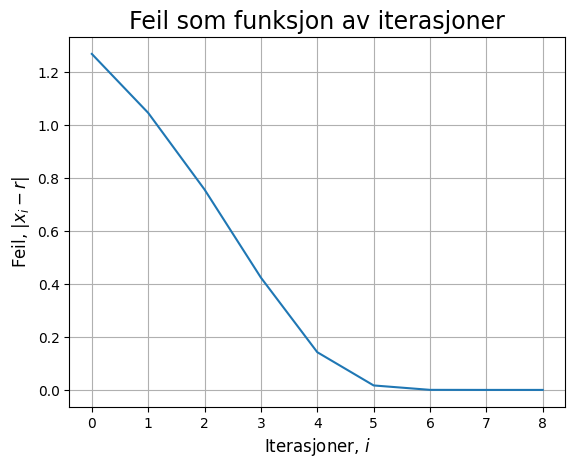

In [6]:
def e(x_array, exact):
    '''
    Input: Alle gjettene fra Newtons metode og den eksakte løsningen
    Output: Absoluttverdien av differansen mellom gjettene og eksakt løsning
    '''
    return abs(x_array - exact)

def p(e_i):
    '''
    Input: Tar inn absoluttverdien av differansen mellom Newton-gjettene og eksakt løsning
    Output: Et estimat av metodens orden
    '''
    p_i = np.zeros(len(e_i))
    for i in range(1,len(e_i)): # Itererer over antall gjett og regner ut p_i der
        p_i[i] = (np.log(e_i[i]/e_i[i-1]))/(np.log(e_i[i-1]/e_i[i-2])) 
    return p_i

e_i = e(newtonGuess14, eq15)

qEst = p(e_i)[-1]
print(f'Estimatet vårt for orden er {qEst}, altså {qEst:.0f}.')

plt.plot(iter14, e_i)
plt.title("Feil som funksjon av iterasjoner", fontsize=17)
plt.xlabel("Iterasjoner, $i$", fontsize=12)
plt.ylabel("Feil, $|x_i-r|$", fontsize=12)
plt.grid(True, which = "both")
plt.show()

Dersom vi sammenligner vår graf for feil med Figur 3 fra prosjektbeskrivelsen, kan vi slå fast at Newtons metode har det som kalles superlinær konvergens. I prosjektbeskrivelsen er det også nevnt at superlineær konvergens innebærer at konvergensordenen $q>1$. Ved hjelp av våre gjett med Newtons metode fra forrige deloppgave, eksakt verdi fra ligning 15 og følgen $p_i$ definert i ligning 17, har vi estimert konvergensordenen til Newtons metode til å være 2, eller kvadratisk konvergensorden som det også kalles. 

Estimeringen av orden og plotting av feil som funksjon av iterasjoner har derfor begge bekreftet at Newtons metode har kvadratisk konvergensorden, noe som stemmer med det som ble oppgitt om metoden i prosjektbeskrivelsen.

At noe konvergerer kvadratisk vil si at feilen i løsningen reduseres kvadratisk hver gang iterasjon. Dette betyr at metoden konvergerer raskt, noe som senker kodens kjøretid. Dette krever derimot et godt innledende gjett for nullpunktet.

### Oppgave 1 e)

Etter å ha fått forståelse for Newtons metode, skal vi nå vende tilbake til vårt virkelige problem. Dette begynner med å regne ut væskevolumet som funksjon av temperaturen. 

Ved kritisk volum, altså kritisk temperatur, vil gassvolum og væskevolum være likt, ettersom forskjellen mellom gass og væske forsvinner her. Dette kan vi bruke til vår fordel i oppgaven, ettersom det vil være et positivt tegn dersom begge følgene konvergerer mot samme volum.

In [7]:
# Ligning 11 og dens deriverte med hensyn på Vv og Vg

def f11(Vv,Vg,T):
    return R*T*(1/(Vg - b) - 1/(Vv - b)) - a*(1/Vg**2 - 1/Vv**2)

def f11DerG(Vv,Vg,T):
    return (2*a)/Vg**3 - (R*T)/(Vg - b)**2

def f11DerV(Vv,Vg,T):
    return (R*T)/(b-Vv)**2 - (2*a)/Vv**3

In [8]:
# Ligning 12 og dens deriverte med hensyn på Vv og Vg

def f12(Vv,Vg,T):
    ledd1 = ((R*T)/(Vg - Vv))*np.log((Vg - b)/(Vv - b)) 
    ledd2 = (R*T)/(Vg - b)
    ledd3 = a*(1/(Vg*Vv) - 1/(Vg**2))
    return ledd1 - ledd2 - ledd3

def f12DerG(Vv,Vg,T):
    ledd1 = (a*(Vg - 2*Vv))/(Vg**3 * Vv)
    ledd2 = (R*T*(b - 2*Vg + Vv))/((Vg - b)**2 * (Vg - Vv))
    ledd3 = (R*T*(np.log((b - Vg)/(b - Vv))))/(Vg - Vv)**2
    return ledd1 - ledd2 - ledd3

def f12DerV(Vv,Vg,T):
    ledd1 = a/(Vg * Vv**2)
    ledd2 = (R*T)/((b - Vv)*(Vg - Vv))
    ledd3 = (R*T*(np.log((b - Vg)/(b - Vv))))/(Vg - Vv)**2
    return ledd1 + ledd2 + ledd3

In [9]:
def jacobiMatrix(x, fDerV, fDerG, hDerV, hDerG,T):
    '''
    Input: Array med de gjett for Vv og Vg, og de deriverte av funksjonene mhp. Vv og Vg
    Output: Jakobimatrisen til ligningssettet
    '''
    fdv, fdg = fDerV(x[0], x[1],T), fDerG(x[0], x[1],T) # Regner ut de deriverte av ligning f mhp. Vv og Vg
    hdv, hdg = hDerV(x[0], x[1],T), hDerG(x[0], x[1],T) # Regner ut de deriverte av ligning h mhp. Vv og Vg
    jacobiMatrise = np.array([[fdv, fdg], [hdv, hdg]])  # Konstruerer Jakobimatrisen som beskrevet i appendiksen
    return jacobiMatrise

def functionSet(x,f,h,T):
    '''
    Input: Array med de gjett for Vv og Vg, ligningene som skal løses og temperaturen de skal løses ved
    Output: Array med de to funksjonene løst mhp. gjettene og temperaturen
    '''
    f11, f12 = f(x[0],x[1],T), h(x[0],x[1],T) # Løser ligningene med gjettene og temperaturen
    funksjoner = np.array([f11,f12])          # Samler løsningene i ett array
    return funksjoner


def newton2Variables(v0, g0, f, h , fDerV, fDerG, hDerV, hDerG, maxIter, tol, T):
    '''
    Input: Gjett for Vv og Vg, ligningene som skal løses og deres deriverte mhp. Vv og Vg, maks iterasjoner, 
    toleransen for når endringen blir liten nok og temperaturen ligningene skal løses ved
    Output: Array med de endelige gjettene for Vv og Vg
    '''
    x = np.array([v0,g0]) # Setter gjett-arrayet til å være de opprinnelige gjettene
    i = 0
    delta = 1 # Definerer en delta større en toleransen så iterasjonen kan starte

    '''Kjører en while-løkke som breaker hvis normen av delta(gjettendringen) blir mindre enn toleransen,
    eller hvis antall iterasjoner overgår det vi har satt som maks antall iterasjoner'''
    while (np.linalg.norm(delta) > tol) and (i < maxIter-1):
        j = jacobiMatrix(x,fDerV,fDerG,hDerV,hDerG,T) # Finner Jakobimatrisen til funksjonene
        funk = functionSet(x,f,h,T)                   # Løser funksjonene med riktige verdier
        delta = np.linalg.solve(j, -funk)             # Regner ut delta av ligningssystemet
        x += delta                                    # Oppdaterer x
        i += 1
    return x


In [10]:
newton2Temps = np.linspace(274,647,374) # Lager et array med alle temperaturene fra 274K til 647K

vvArray = np.zeros(len(newton2Temps)) # Lager et array å lagre utregnede verdier for Vv i
vgArray = np.zeros(len(newton2Temps)) # Lager et array å lagre utregnede verdier for Vg i

vvGuess = 35.7*mL    # Ganger med mL for å få gjettet i m^3
vgGuess = 12.6*liter # Ganger med L for å få gjettet i m^3

#Itererer gjennom temperaturene mellom 274 og 647
for i in range(len(newton2Temps)):
    vvArray[i],vgArray[i] = newton2Variables(vvGuess,vgGuess,f11,f12,f11DerV,f11DerG,f12DerV,f12DerG,600,6e-10,newton2Temps[i]) # Finner verdier for Vv og Vg for hver temperatur
    vvGuess = vvArray[i] # Endrer Vv gjettet for neste temperatur
    vgGuess = vgArray[i] # Endrer Vg gjettet for neste temperatur

vvArraymL = vvArray/mL   # Endrer verdiene tilbake til mL for mer forståelig graf
vgArrayL = vgArray/liter # Endrer verdiene tilbake til L for mer forståelig graf

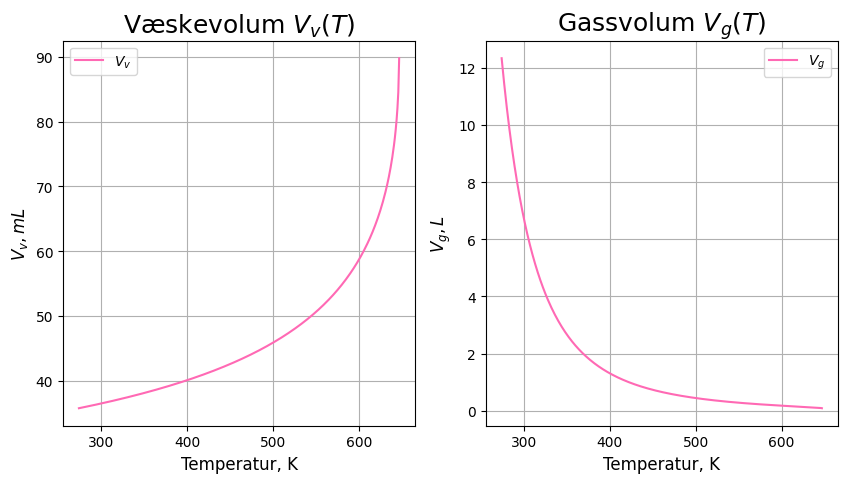

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(newton2Temps, vvArraymL, label="$V_v$", color = "hotpink")
ax[0].set_title("Væskevolum $V_v(T)$", fontsize = 18)
ax[0].set_xlabel("Temperatur, K", fontsize = 12)
ax[0].set_ylabel("$V_v, mL$", fontsize = 12)
ax[0].grid()
ax[0].legend()

ax[1].plot(newton2Temps, vgArrayL, label="$V_g$", color = "hotpink")
ax[1].set_title("Gassvolum $V_g(T)$", fontsize = 18)
ax[1].set_xlabel("Temperatur, K", fontsize = 12)
ax[1].set_ylabel("$V_g, L$", fontsize = 12)
ax[1].grid()
ax[1].legend()
plt.show()


Fra prosjektbeskrivelsen fikk vi oppgitt løsningen for $V_g$ og $V_v$ for $T=273K$. Vi valgte å bruke dette som startverdier, og tilnærmet oss volumene ved å bevege oss skrittvis og benyttet de nye utregnede volumene som startverdi ved neste temperatur. Vi synes dette virket lurt, ettersom det nye utregnede volumet ville være ikke alt for langt unna neste verdi. 

Fra plottene observerer vi at Vg alltid er større enn Vv, noe som stemmer med informasjon fra prosjektbeskrivelsen. De konvergerer også mot samme verdi, nemlig $V_c = 3b$ fra oppgave 1 a). Vi vet derimot at dette ikke egentlig er det rette kritiske volumet. Dette er viktig å huske på i senere oppgaver.

Når $T$ nærmer seg $T_c$, blir $\Delta V$ for $V_g$ mindre, mens $\Delta V$ for $V_v$ blir veldig stor. Når det gjelder $V_v$, vil $\Delta V$ bli større ved økende temperatur ettersom tettheten til vannet vil synke og vannet tar større plass. Ettersom væske og gassvolum skal møtes i det kritiske volumet $V_c$, tilsier dette altså at $\Delta V$ for $V_g$ må synke med temperaturen.

### Oppgave 1 f)


Ettersom eksperimentelle verdier beskriver faktiske forhold, kan det være interessant å sammenligne tilnærmingene vi kan gjøre vha. numeriske metoder og ligninger som van der Waals med virkeligheten. Dette er viktig for å se hvor treffsikre tilnærmingene faktisk er, og for å kartlegge hvilke temperaturer forenklingene kanskje ikke fungerer for. 

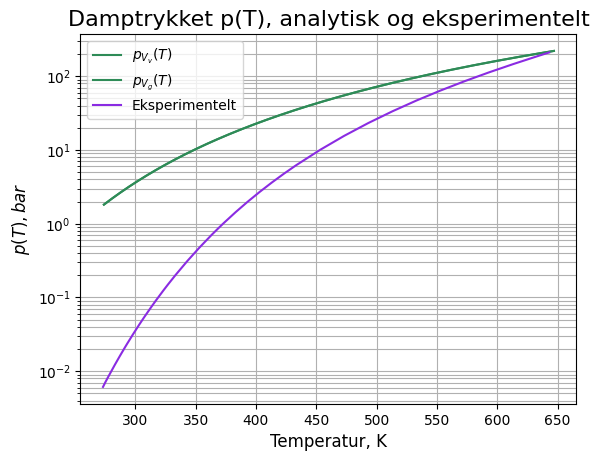

In [32]:
my_data = genfromtxt('Damptrykk.csv', delimiter=';',skip_header=1) # Laster inn damptrykkene fra csv fila
exptemps = my_data.T[0] # Lagrer temperaturene
exppressures = my_data.T[1]*1000 # Trykket ligger som kPa i fila, så ganger med 1000 for å ha de i Pa

def vdwNew(volumes,temps): # Definerer en ny van der Waals funksjon hvor temperaturen kan varieres
    '''
    Input: Alle volum og tilhørende temperatur
    Output: Trykket i ved alle volum/temperatur
    '''
    p = (R*temps)/(volumes-b)-a/(volumes**2) # Van der Waals ligning
    return p

pVv = vdwNew(vvArray,newton2Temps) # Regner ut damptrykket vha. Vv
pVg = vdwNew(vgArray,newton2Temps) # Regner ut damptrykket vha. Vg


plt.plot(newton2Temps, pVv*bar, label="$p_{V_v}(T)$", color="seagreen") # Plot for p(T), får y-akse til bar
plt.plot(newton2Temps, pVg*bar, label="$p_{V_g}(T)$", color="seagreen") # Plot for p(T), får y-akse til bar
plt.plot(exptemps,exppressures*bar, label="Eksperimentelt",color="blueviolet")  # Gjør om til bar
plt.semilogy()
plt.title("Damptrykket p(T), analytisk og eksperimentelt", fontsize=16)
plt.xlabel("Temperatur, K", fontsize=12)
plt.ylabel("$p(T), bar$", fontsize=12)
plt.grid(True, which="both")
plt.legend()
plt.show()

Som forventet blir resultatene ved bruk av $V_v$ og $V_g$ i van der Waals nærmest identiske, og ender derfor oppå hverandre i plottet. Begge treffer også de eksperimentelle verdiene i det kritiske punktet, men passer veldig dårlig for resten av temperaturene.

Vi observerer at med synkende temperatur, blir avviket større og større. Dette skyldes at van der Waals ligning er konstruert rundt det kritiske punktet, dette ser vi blant annet i 1a) i utregningen av a og b hvor vi bruker eksperimentelle verdier for kritisk temperatur og kritsk trykk. Jo lengre unna vi er det kritiske punktet, desto større blir avviket. 

### Oppgave 1 g)

For en konstant temperatur vil forholdet mellom trykk og volum kunne beskrives av en relativt enkel graf. Denne kan vi finne ved å benytte $V_v, V_g, p_{V_v}$ og $p_{V_g}$. Fra 1b) vet vi også at formen vil flates ut når temperaturen nærmer seg kritisk temperatur. Grafen vil representere de ulike fasene vannet befinner seg i, og hvor det evt. skjer en faseovergang.

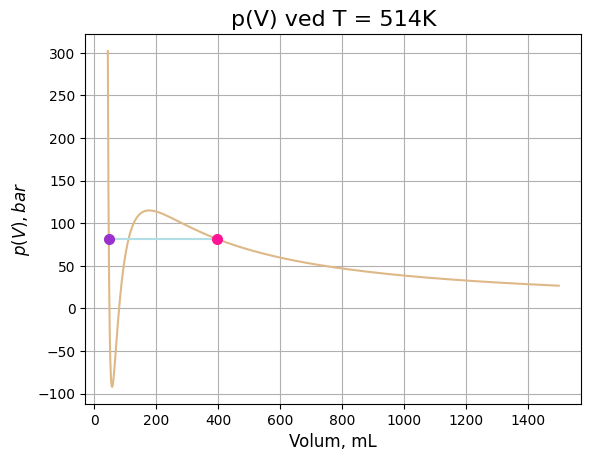

In [13]:
chosenTemp = 514
spesVv = vvArray[chosenTemp-274-1] # Finner Vv ved vår valgte temperatur
spesVg = vgArray[chosenTemp-274-1] # Finner Vg ved vår valgte temperatur
spespVv = pVv[chosenTemp-274-1]    # Finner pVv ved vår valgte temperatur
spespVg = pVv[chosenTemp-274-1]    # Finner pVg ved vår valgte temperatur

volumeArray = np.linspace(44*mL,1500*mL,1456) # Lager et array med verdier mellom valgte volumverdier
pV514 = vdwNew(volumeArray,chosenTemp)        # Regner ut trykket med de ulike volumene og den valgte temperaturen

plt.plot(volumeArray/mL, pV514*bar, color = "burlywood")
plt.plot([spesVv/mL,spesVg/mL],[spespVv*bar,spespVg*bar], color = "powderblue")
plt.plot(spesVv/mL,spespVv*bar, marker="o", markersize=7, color = "darkorchid")
plt.plot(spesVg/mL,spespVg*bar, marker="o", markersize=7, color = "deeppink")
plt.title(f'p(V) ved T = {chosenTemp}K', fontsize=16)
plt.xlabel("Volum, mL", fontsize=12)
plt.ylabel("$p(V), bar$", fontsize=12)
plt.grid(True, which="both")
plt.show()

Som nevnt tidligere, vil en isoterm konstruert med van der Waals ha et ufysisk område dersom $T<T_c$, noe vi blant annet observerer når vi ser trykket bli negativt. Derfor erstattes denne delen av grafen med linjen mellom punktene $(V_v,p(V_v))$ og $(V_g,p(V_g))$. Her skjer det en faseovergang, og ettersom faseoverganger alltid skjer ved konstant trykk, blir linjen rett.


### Oppgave 1 h)

Å konstruere et pV-fasediagram for vann er nyttig for å se ved hvilke trykk og volum de ulike fasene eksisterer. Man kan også observere hvor det kritiske punktet inntreffer, og se hvor da gass og væske blir ett. Et slikt pV-diagram er som nevnt viktig ved for eksempel konstruksjon av maskiner som benytter vann ved høye trykk og volum, for å passe på at man ikke ender opp med vann i en uønsket fase.



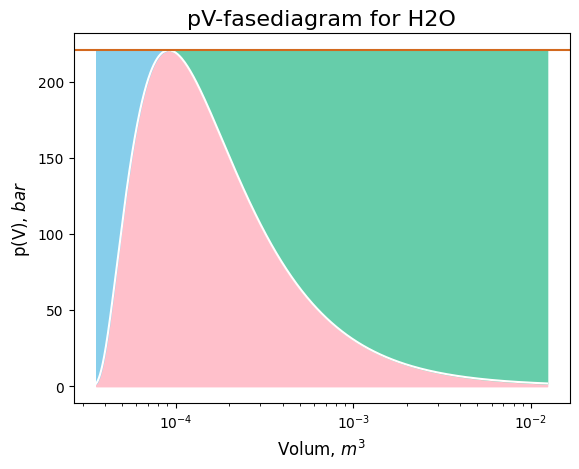

In [14]:
totalVolumes = np.append(vvArray,np.flip(vgArray))  # Flipper vgArray fordi det går fra største til minste verdi
totalPressures = np.append(pVv,np.flip(pVg))        # Flipper pVg fordi den går fra største til minste verdi
criticalPressure = pVv[-1]*bar                      # Vet at Vv nærmer seg Vc når det nærmer seg Tc, og det samme gjelder også for Pc. Kritisk trykk blir der pVv og pVg møtes

plt.plot(totalVolumes, totalPressures*bar, label="$p_{V_g}$", c = "white")
plt.axhline(y=criticalPressure, color = "chocolate")# Plotter en linje for kritisk trykk, da områdene vi skal finne ikke kan befinne seg over dette
plt.semilogx()

plt.fill_between(totalVolumes,totalPressures*bar, color = "pink")              # Væske og gassfasen
plt.fill_between(vvArray,pVv*bar,criticalPressure, color = "skyblue")          # Væskefasen
plt.fill_between(vgArray,pVg*bar,criticalPressure, color = "mediumaquamarine") # Gassfasen

plt.title(f'pV-fasediagram for H2O', fontsize=16)
plt.xlabel("Volum, $m^3$", fontsize=12)
plt.ylabel("p(V), $bar$", fontsize=12)

plt.show()

I fasediagrammet er det tre klare seksjoner. I det blå feltet vil vannet befinne seg i væskeform, i det rosa feltet vil noe befinne seg som væske og noe som gass, og i det grønne feltet vil vannet kun befinne seg i gassform. 

Størrelsen og utstrekningene på feltene stemmer overens med intuitiv tenkning. Vi kan tenke på det som at vi har en boks med gass. Dersom vi holder trykket konstant og komprimerer boksen, er stoffet nødt til å endre fase til slutt. Komprimerer man nok, vil alltid gass ende opp i gass-væske form, og nesten alltid ende opp som væske om vi komprimerer nok. Dette ser vi fordi det blå feltet strekker seg over nesten hele y-aksen.

Vi observerer at ingen av fargene eller selve kurven går over den oransje streken helt øverst. Denne viser det kritiske trykket, og forteller oss at over dette punktet blir forskjellen mellom væske og gass visket ut. Altså eksisterer ingen av de tre feltene her.

# Oppgave 2

Fra oppgave 1 kan man se at det er et avvik mellom eksperimentell og beregnet damptrykkurve. Gjennom oppgave 2 kommer vi til å jobbe med ulike interpolasjonsmodeller som forhåpentligvis kan gi verdier med mindre avvik. Interpolasjonsmodellene kan gjøre slik at vi kan løse Clapeyrons ligning selv om vi startet med kun få eksperimentelle verdier. 

### Oppave 2a)

For å kunne se på og sammenligne avvik mellom numeriske damptrykkkurver og den eksperimentelle damptrykkurven er det nødvendig å importere eksperimentelle verdier for $V_v$, $V_g$ og $L$. Disse verdiene er hentet fra webressursen engineeringtoolbox (2)(3).

In [15]:
MmWater = (1.01*2+16)*10**-3 # Molarmassen for vann i kg/mol

latentHeat = genfromtxt('Latentvarme.csv', delimiter=';') # Laster inn eksperimentelle verdier for latent varme
kelvinH = latentHeat.T[0]  # Temperaturen som tilhører latent varme
L = latentHeat.T[1] # Latent varme i J/mol 

loadVolumes = genfromtxt('Volumer.csv', delimiter=';',skip_header=2, encoding='latin-1')  # Laster inn eksperimentelle verdier for væskevolum og gassvolum
kelvinG = kelvinL = loadVolumes.T[0] # Temperaturene som tilhører væskevolum og gassvolum
Vv = MmWater/loadVolumes.T[1] # Lastes inn i kg/m^3, gjøres om til m^3/mol (eller bare m^3)
Vg = MmWater/loadVolumes.T[2] # Lastes inn i kg/m^3, gjøres om til m^3/mol (eller bare m^3)

Datasettene er ikke evaluert ved de samme verdiene for temperatur. $V_v$ og $V_g$ er evaluert for samme temperaturer, og har 20 datapunkter. Verdt å merke er at de har relativt få datapunkter for lave temperaturer. Latent varme er evaluert for andre temperaturer, og har 35 datapunkter.

### Oppgave 2b)

Ved videre arbeid med de eksperimentelle datasettene vil det være nødvendig med funksjoner som kan representere datasettene. I denne oppgaven skal vi analysere de eksperimentelle verdiene for $V_v$, $V_g$ og $L$ ved bruk av den innebygde funksjonen scipy.optimize.curve_fit. Curvefit bruker interpolasjon til å gi oss en funksjon som er tilnærmet de eksperimentelle verdiene. Det vil ikke nødvendigvis bli en funksjon som passer perfekt til datasettene som sannsynligvis vil gi noe avvik, men noe som følger mønsteret og vil gi oss et bilde på hvordan dataen oppfører seg. 

In [16]:
# Funksjoner som passer til de eksperimentelle verdiene

def polynom4(x, ag, bg, cg, dg, eg):
    '''Tilhører gassvolum'''
    return ag*x**4 + bg*x**3 + cg*x**2 + dg*x +eg

def polynom2(x, av, bv, cv):
    '''Tilhører væskevolum'''
    return av*x**2 + bv*x + cv

def proporsjonal(x, al, bl):
    '''Tilhører latent varme'''
    return al*np.abs(x-Tc)**bl

fitVg, pcov = curve_fit(polynom4, kelvinG, np.log(Vg))  # Bruker logaritmen for å finne en mer nøyaktig løsning
fitVv, pcov = curve_fit(polynom2, kelvinL, np.log(Vv)) # Bruker logaritmen for å finne en mer nøyaktig løsning
fitVl, pcov = curve_fit(proporsjonal, kelvinH, L)



/tmp/ipykernel_606/460845963.py:13: RuntimeWarning: divide by zero encountered in power
  return al*np.abs(x-Tc)**bl


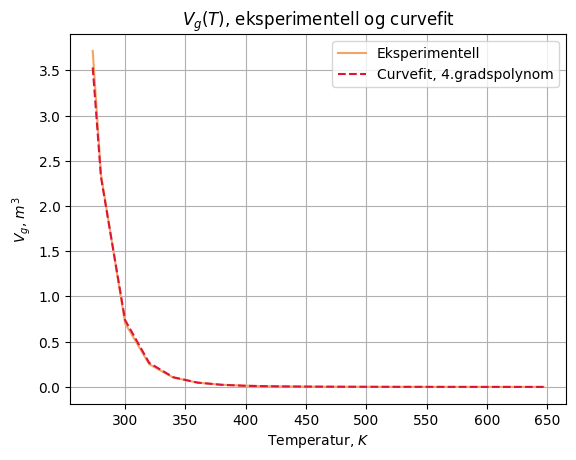

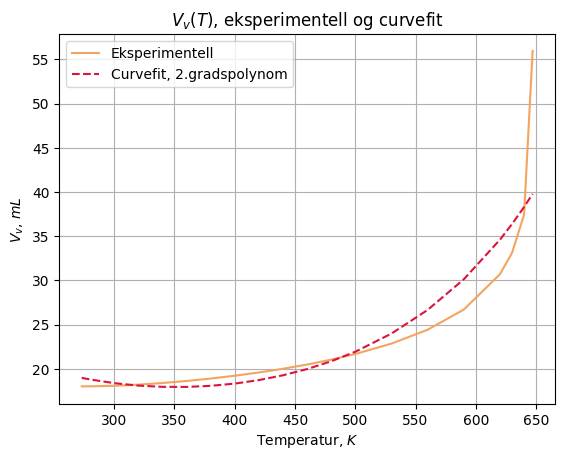

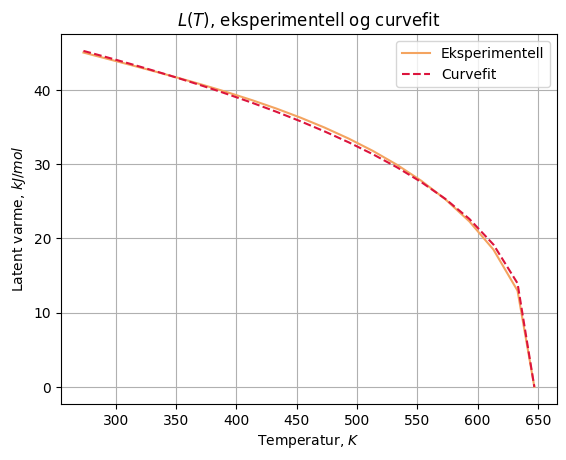

In [17]:
#Plot for Vg(T)
plt.plot(kelvinG, Vg, label="Eksperimentell", color = "sandybrown")
plt.plot(kelvinG, np.exp(polynom4(kelvinG, *fitVg)), '--', label = "Curvefit, 4.gradspolynom", color = "crimson") #Reverserer log for riktig graf
plt.title("$V_g(T)$, eksperimentell og curvefit")
plt.xlabel("Temperatur, $K$")
plt.ylabel("$V_g$, $m^3$")
plt.legend()
plt.grid()
plt.show()

#Plot for Vv(T), i mL for penere y-akse
plt.plot(kelvinL, Vv/mL, label="Eksperimentell", color = "sandybrown")
plt.plot(kelvinL, np.exp(polynom2(kelvinL, *fitVv))/mL, '--', label= "Curvefit, 2.gradspolynom", color = "crimson") #Reverserer log for riktig graf
plt.title("$V_v(T)$, eksperimentell og curvefit")
plt.xlabel("Temperatur, $K$")
plt.ylabel("$V_v$, $mL$")
plt.legend()
plt.grid()
plt.show()

#Plot for L(T), i kJ/mol for penere y-akse
plt.plot(kelvinH, L/1000, label = "Eksperimentell", color = "sandybrown")
plt.plot(kelvinH, proporsjonal(kelvinH, *fitVl)/1000, '--', label="Curvefit", color = "crimson")
plt.title("$L(T)$, eksperimentell og curvefit")
plt.xlabel("Temperatur, $K$")
plt.ylabel("Latent varme, $kJ/mol$")
plt.legend()
plt.grid()
plt.show()



Fra plottene over kan man se at finner vi en god tilnærming til verdiene for $V_g$ og $L$, som benytter seg av henholdsvis et fjerdegradspolynom og en ikke-lineær funksjon (som vi har kalt "proporsjonal"), men funksjonen for $V_v$ avviker fra de eksperimentelle verdiene, der den mest nøyaktige tilnærmingen var et andregradspolynom. Dette gjelder spesielt for verdier større enn 550K og verdier mindre enn 300K. Dette kan føre til følgefeil i videre oppgaver der $V_v$ tas i bruk. 

Vi har tatt logaritmen av verdiene når vi benytter de i curvefit for å finne en mer nøyaktig løsning, og må derfor konvertere de tilbake til deres egentlige verdier når de skal brukes.

Vi vil kommentere at vi har stusset litt over verdiene på y-aksen til $V_g(T)$ (og noe $V_v(T)$), ettersom verdiene ble såpass mye høyere enn for de tilsvarende grafene i oppgave 1. Etter diskusjoner innad i gruppa kom vi likevel frem til at grafene stemmer, ettersom både $V_g$ og $V_v$ konvergerer mot den eksperimentelle verdien for $V_c$. Vi fikk i ettertid bekreftet av stud.ass. at aksene våre var rett, og har basert på dette og diskusjonen valgt å la de stå slik.

### Opggave 2c)

For å jobbe videre med tilnærmingsfunksjonene er det sentralt at de er gode tilnærminger på den eksperimentelle dataen. I denne oppgaven skal vi teste hvor gode tilnærmingsfunksjonene er ved bruk av Simpsons metode på Clapeyrons likning og sammenlikne den numeriske $p(T)$ med den eksperimentelle. Clapeyrons ligning er definert som

$$
dp = \frac{L(T)}{T \cdot (V_{g}(T) - V_{v}(T))}dT,
$$

 og i vårt tilfelle er $L(T)$, $V_v(T)$, og $V_g(T)$ tilnærmingsfunksjonene laget med curvefit fra 2b).

In [18]:
#Definerer tilnærmingsfunksjonene med de nye konstantene funnet gjennom curvefit
def VgFunk(x):
    return np.exp(fitVg[0]*x**4 + fitVg[1]*x**3 + fitVg[2]*x**2 + fitVg[3]*x + fitVg[4])

def VvFunk(x):
    return np.exp(fitVv[0]*x**2 + fitVv[1]*x + fitVv[2])

def LFunk(x):
    return fitVl[0]*np.abs(x-Tc)**fitVl[1]


In [19]:
def pDeriv(x):
    '''Clapeyrons ligning, ligning 13 fra oppgavebeskrivelsen'''
    return LFunk(x)/(x*(VgFunk(x) - VvFunk(x))) 

def simpson(f, a, b, n):
    '''
    Input: Funksjonen som skal integreres, integrasjonsgrensene og antall iterasjoner
    Output: Den tilnærmede verdien av integralet
    '''
    h = (b-a)/n
    S1 = 0
    S2 = 0
    #Regner ut de ulike leddene som definert i simpsons metode
    for i in range(1,int(n/2+1)):
        x = a+(2*i-1)*h
        S1 += f(x)
    for i in range(1,int(n/2)):
        x = a+2*i*h
        S2 = S2 + f(x)
    S = (h/3)*(f(a) + 4*S1 + 2*S2 + f(b)) 

    return S

numPressures = 373 # Antall trykk vi ønsker å regne ut for
numericalPressures = np.zeros(numPressures)
temps = np.linspace(273, 647, numPressures)
for i in range(0, numPressures):
    numericalPressures[i] = simpson(pDeriv, 274, i+274, numPressures)

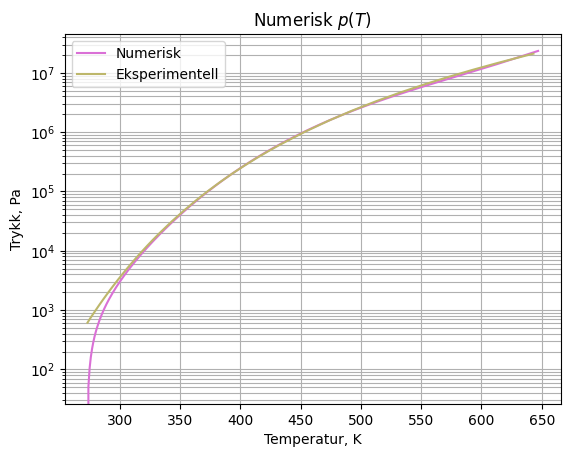

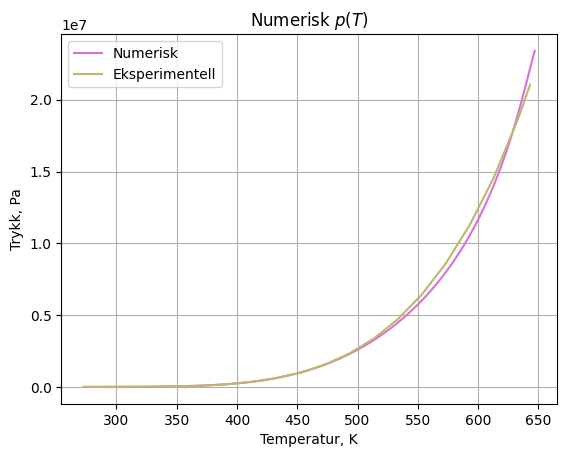

In [20]:
#Plot for semiology
plt.plot(temps, numericalPressures, color = "orchid", label ="Numerisk")
plt.plot(exptemps, exppressures, color = "darkkhaki", label="Eksperimentell")
plt.semilogy()
plt.title("Numerisk $p(T)$")
plt.xlabel("Temperatur, K")
plt.ylabel("Trykk, Pa")
plt.grid(True, which = "both")
plt.legend()
plt.show()

#Plot
plt.plot(temps, numericalPressures, color = "orchid", label ="Numerisk")
plt.plot(exptemps, exppressures, color = "darkkhaki", label="Eksperimentell")
plt.title("Numerisk $p(T)$")
plt.xlabel("Temperatur, K")
plt.ylabel("Trykk, Pa")
plt.grid(True, which = "both")
plt.legend()
plt.show()

Fra plottene kan man se at den numeriske beregningen av $p(T)$ og de eksperimentelle verdiene for $p(T)$ er nesten identiske for temperaturer mellom 320K og 530K, med et lite avvik på starten og slutten av grafen. Dette tyder på at tilnærmingsfunksjonene til $V_g$, $V_v$ og $L$ er gode tilnærminger på den eksperimentelle dataen for det meste. Avviket for temperaturer mindre enn 320K og større enn 530K kan i stor del tilskrives tilnærmingsfunksjonen til $V_v$ da man kan se fra plottet i 2b) at for T mindre enn 320K og større enn 550K svinger tilnærmingsfunksjonen vekk fra de eksperimentelle verdiene. Numeriske feil i Simpsons metode kan også ha hjulpet til med å skape avvik fra den eksperimentelle kurven. I tillegg kan avviket skyldes at vi har mistet data når vi har satt alle tilnærmingsfunksjonene sammen i Simpsons metode, da latent varme har flere verdier enn væske-og gassvolum. Alt i alt er den numeriske beregningen med curvefit for damptrykkkurven en god tilnærming.

### Oppgave 2d)

Cubic spline er en annen interpolasjonsmetode for å finne en tilnærmet modell for de eksperimentelle datasettene, i likhet med curvefit. Metoden ser på oppførselen mellom hvert punkt på et gitt intervall, og finner en funksjon som passer til hvert av disse punktene, som står beskrevet på side 10 i oppgavebeskrivelsen. På denne måten kan vi tenke oss at cubic spline er en bedre modell enn curvefit, siden den går mer detaljert mellom verdiene, og vil da finne en mer nøyaktig modell. Likevel kan det føre til feil i de områdene der verdiene f.eks er feil. En slik verdi kalles en "outlier", og cubic spline vil da gå gjennom dette punktet og føre til avvik. Da kan det være bedre å benytte seg av curvefit, som man kan tenke seg fungerer litt som et menneske, som vil skjønne at en slik outlier kan føre til feil og finne en funksjon som passer på at denne verdien ikke ødelegger. Hvor god modell cubic spline vil gi oss her skal vi da undersøke ved å sammenligne med eksperimentelle verdier for $V_g$, $V_v$ og $L$. Vi skal i tillegg sammenlige interpolasjonsmetoden med curvefit for å se hvilken som vil gi oss den beste modellen. 

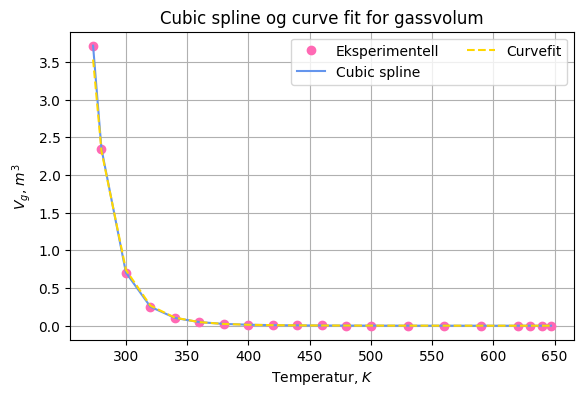

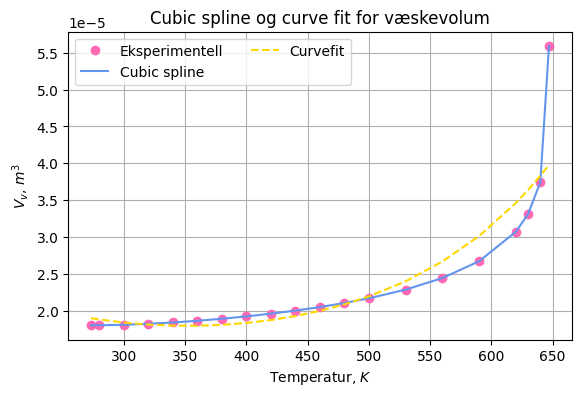

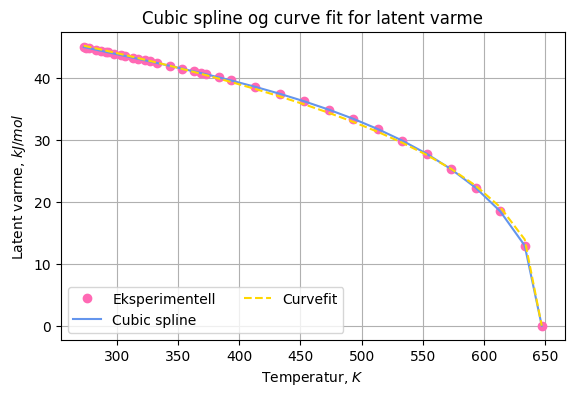

In [21]:
# Interpolasjon for Vg
VgCubic = CubicSpline(kelvinG, Vg)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(kelvinG, Vg, 'o', color="hotpink", label='Eksperimentell')
ax.plot(kelvinG, VgCubic(kelvinG), color="cornflowerblue", label="Cubic spline")
ax.plot(kelvinG, np.exp(polynom4(kelvinG, *fitVg)), '--', color="gold", label="Curvefit")
ax.legend(loc='upper right', ncol=2)
plt.title("Cubic spline og curve fit for gassvolum")
plt.xlabel("Temperatur, $K$")
plt.ylabel("$V_g$, $m^3$")
plt.grid()
plt.show()

# Interpolasjon for Vv
VvCubic = CubicSpline(kelvinL, Vv) # Innebygd funksjon
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(kelvinL, Vv, 'o', color="hotpink", label='Eksperimentell') # Diskret data
ax.plot(kelvinL, VvCubic(kelvinL), color="cornflowerblue", label="Cubic spline") # Tilpasning ved cubic spline  
plt.plot(kelvinL, np.exp(polynom2(kelvinL, *fitVv)), '--', color="gold", label="Curvefit") # Tilpasning ved curve fit
ax.legend(loc='upper left', ncol=2)
plt.title("Cubic spline og curve fit for væskevolum")
plt.xlabel("Temperatur, $K$")
plt.ylabel("$V_v$, $m^3$")
plt.grid()
plt.show()


# Interpolasjon for L
LCubic = CubicSpline(kelvinH, L)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(kelvinH, L/1000, 'o', color="hotpink", label='Eksperimentell')
ax.plot(kelvinH, LCubic(kelvinH)/1000, color="cornflowerblue", label="Cubic spline")
plt.plot(kelvinH, proporsjonal(kelvinH, *fitVl)/1000, '--', color="gold", label="Curvefit")
ax.legend(loc='lower left', ncol=2)
plt.title("Cubic spline og curve fit for latent varme")
plt.xlabel("Temperatur, $K$")
plt.ylabel("Latent varme, $kJ/mol$")
plt.grid()
plt.show()

Man kan se fra plottene at cubic spline passer veldig godt til datasettene. Cubic spline treffer til en hver tid alle punktene for de eksperimentelle verdiene, mens curvefit har noen avvik fra datasettene. Plottet for $V_v$ viser en spesiell stor forskjell mellom curvefit og cubic spline, da curvefit funksjonen har et stort avvik fra de eksperimentelle verdiene for temperaturer fra omtrent 500K til 650K, mens cubic spline følger alle datapunktene. I plottet for $V_g$ og $L$ er curvefit funksjonen og cubic spline tilnærmet like, med et lite avvik for temperaturer mellom 600K og 650K i plottet for $L$. Alt tatt i betraktning passer curvefit og cubic spline ganske godt til de eksperimentelle datsettene, men cubic spline er noe bedre spesielt for verdiene for $V_v$. 

### Oppgave 2e)

I denne oppgaven skal vi gjøre som i 2c) og beregne en modell for damptrykket ved bruk av funksjonene vi lagde med cubic spline i 2d). Dette skal gjøres ved å integrere Clapeyrons likning ved simpsons metode ved bruk av funksjonene for $L$, $V_v$ og $V_g$ som ble funnet i 2d), for videre å avgjøre om de er tilstrekkelig gode til å bekrive de eksperimentelle damptrykkurven. 

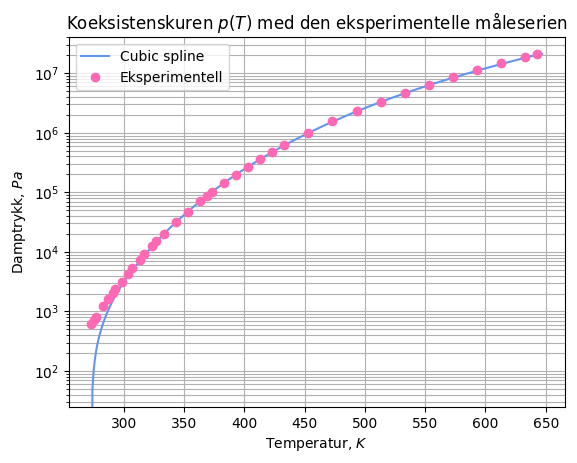

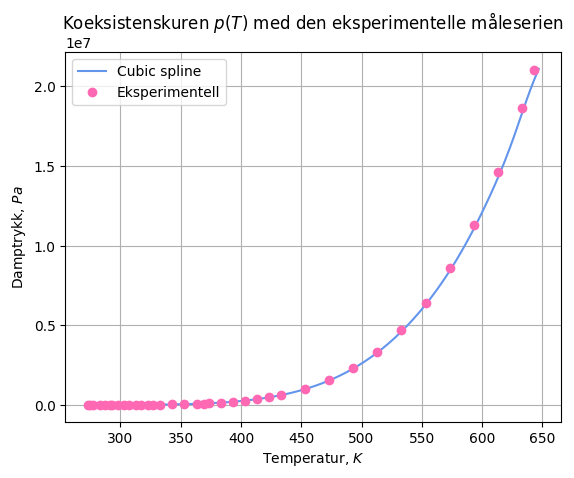

In [31]:
# Integrerer ligning (13) ved bruk av interpolasjonene og 2c)
def pDerivCubic(x):
    '''
    Input: Temperaturverdier som settes inn i cubic spline funksjonene fra 2d)
    Output: Damptrykket gitt ved cubic spline
    '''
    return LCubic(x)/(x*(VgCubic(x) - VvCubic(x)))

numPressures = 373
pInterpolasjon = np.zeros(numPressures)
for i in range(1, 373):
    pInterpolasjon[i] = simpson(pDerivCubic,274, i+ 274, numPressures)

# Plot for semiology
plt.plot(temps, pInterpolasjon, color="cornflowerblue", label="Cubic spline")
plt.plot(exptemps, exppressures, 'o', color="hotpink", label="Eksperimentell")
plt.semilogy()
plt.title("Koeksistenskuren $p(T)$ med den eksperimentelle måleserien")
plt.xlabel("Temperatur, $K$")
plt.ylabel("Damptrykk, $Pa$")
plt.legend()
plt.grid(True, which = "both")
plt.show()

#Plot
plt.plot(temps, pInterpolasjon, color="cornflowerblue", label="Cubic spline")
plt.plot(exptemps, exppressures, 'o', color="hotpink", label="Eksperimentell")
plt.title("Koeksistenskuren $p(T)$ med den eksperimentelle måleserien")
plt.xlabel("Temperatur, $K$")
plt.ylabel("Damptrykk, $Pa$")
plt.legend()
plt.grid(True, which = "both")
plt.show()

Vi observerer at Simpsons funksjon for cubic spline representerer de eksperimentelle verdiene godt med et avvik for temperaturer mindre enn 300K. Dette kan virke overraskende da cubic spline plottene i 2d) fulgte punktene hele veien. Dette kan derfor tyde på at avviket kan skyldes numeriske feil i Simpsons metode og ikke feil i tilnærmingen til de eksperimentelle verdiene. Siden feilen er størst helt i starten kan man tenke seg at feilleddet er større jo ferre verdier vi har. 

En annen grunn til avviket kan være at vi rett og slett ikke har datapunkter der curve fit avviker fra den eksperimentelle måleserien helt i starten. De esperimentelle verdiene for gassvolum og væskevolum har 20 verdier hver, mens latent varme har 35 verdier, som var de verdiene som ble importert. Når vi da integrerte for å finne damptrykket, gir det da mening at vi har mistet verdier, som da har ført til avviket helt i starten. 

Alt i alt så kan man se at grafen for Simpsonsfunksjon for cubic spline er en god tilnærming for den eksperimentelle kurven og vi kan dermed konkludere med at interpolasjonen er gyldig innenfor alle temperaturer fra omtrent 300K og utover. 

### Oppgave 2f)

I denne oppgaven skal vi undersøke hvilken modell som passer best til å beskrive damptrykkurven. Vi har allerede sett at cubic spline er en bedre modell enn curvefit, og at van der Waals ikke er en god tilnærming til de eksperimentelle verdiene. Her skal det i tillegg undersøkes om en analytisk løsning funnet ved bruk av den integrerte Clapeyrons ligning kan være en god tilnærming. Denne ligningen er gitt ved

$$
p \left(T \right) = p_{0} \exp \biggr[ \frac{L}{R} \left( \frac{1}{T_{0}} - \frac{1}{T} \right) \biggr].
$$

Å finne en god og nøyaktig modell for å beskrive koeksistensen mellom gass og væske er en viktig øving for å bli god til å minimere avvik. En slik erfaring er veldig nyttig senere i livet når man skal jobbe med situasjoner hvor det er helt avgjørende at ting fungerer. Ingen av modellene vil selvfølgelig være perfekte, men det er viktig å se på hvilke områder modellene treffer bra, slik at man kan benytte seg av en kombinasjon for å totalt få den beste modellen. 

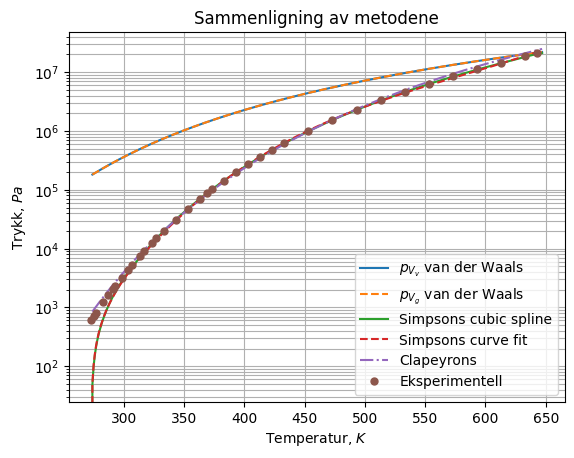

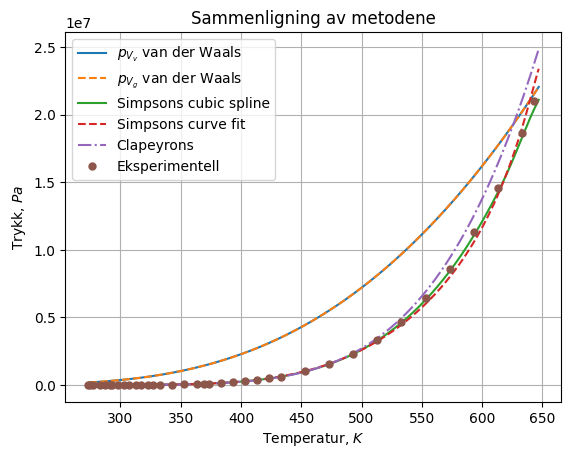

In [30]:
# Referansepunkter, det er ved disse verdiene det skifter fra væske til gass
p0 = 100*1000
t0 = 374
l = 40650

def pIdeell(x, l, p0, t0):
    '''
    Input: Et array med temperaturer, bestemte verdier for latent varme, referansetrykk og referansetemperatur
    Output: Trykket gitt ved ligning (6)
    '''
    pAnalytisk = np.zeros(len(x)) 
    for i in range(len(x)):
        pAnalytisk[i] = p0 * np.exp(l/(R*t0) - l/(R*x[i]))
    return pAnalytisk

   
pIdeellPlot = pIdeell(newton2Temps, l, p0, t0)                   

# Plot for alle metodene semiology
plt.plot(newton2Temps, pVv, label="$p_{V_v}$ van der Waals") 
plt.plot(newton2Temps, pVg, '--', label="$p_{V_g}$ van der Waals") 
plt.plot(temps, pInterpolasjon, label="Simpsons cubic spline")
plt.plot(temps, numericalPressures, '--', label="Simpsons curve fit")
plt.plot(newton2Temps, pIdeellPlot, '-.', label="Clapeyrons")
plt.semilogy()
plt.plot(exptemps, exppressures, 'o', markersize=5, label="Eksperimentell")
plt.title("Sammenligning av metodene")
plt.xlabel("Temperatur, $K$")
plt.ylabel("Trykk, $Pa$")
plt.legend()
plt.grid(True, which = "both")
plt.show()

# Plot for alle metodene
plt.plot(newton2Temps, pVv, label="$p_{V_v}$ van der Waals") 
plt.plot(newton2Temps, pVg, '--', label="$p_{V_g}$ van der Waals") 
plt.plot(temps, pInterpolasjon, label="Simpsons cubic spline")
plt.plot(temps, numericalPressures, '--', label="Simpsons curve fit")
plt.plot(newton2Temps, pIdeellPlot, '-.', label="Clapeyrons")
plt.plot(exptemps, exppressures, 'o', markersize=5, label="Eksperimentell")
plt.title("Sammenligning av metodene")
plt.xlabel("Temperatur, $K$")
plt.ylabel("Trykk, $Pa$")
plt.legend()
plt.grid(True, which = "both")
plt.show()

Fra plottet her kan det ses hvor dårlig van der Waals tilstandsligning er til å representere faktiske datasett. Likevel har vi fra oppgave 1 sett at tilstandslikningen er nyttig til å beskrive andre ting, som sammenhengen mellom damptrykket og temperaturen, og beskriver kvalitativt faselikevekten mellom væske og gass. Årsaken til at van der Waals tilstandsligning har vist store avvik fra de faktiske datapunktene er som vist tidligere at det ikke finnes noen kombinasjoner av a og b som vil gi oss noe i nærheten av eksakte verdier langt unna kritisk punkt.

De resterende modellene er alle veldig gode til å senke avviket til de eksperimentelle dataene og kan hver for seg sies å være gode tilnærminger til de eksperimentelle verdiene. På grunn av eventuelle numeriske feil og det at vi har få verdier for væske og gassvolum ved lave temperaturere er det den analytiske løsningen funnet ved  Clapeyrons ligning som gir den beste tilnærmingen for startverdiene. Årsaken til at denne analytiske ligningen passer godt til datasettet, til tross for at dette ikke er en "realistisk" modell, kan være fordi vi kan anta at L er tilnærmet konstant i nærheten av valgt referansepunkt, (100 000Pa, 374K), for damptrykket og temperaturen (5, side 3). Derfor ser vi at modellen opplever noe avvik mot slutten, da vi er langt unna referansepunktet. 

Etterhvert som den analytiske løsningen opplever større avvik, observerer vi at curvefit og cubic spline begynner å ligge tilnærmet rett oppå datasettet. Curvefit har noe mer avvik enn cubic spline helt på slutten. Dette kan tilskrives den dårligere tilnærmingen av curvefit for $V_v$ enn cubic spline, noe som skyldes at cubic spline tar hensyn til hvert enkelt punkt mens curvefit ser på en tilnærming med datasettet som helhet. Avviksforskjellen er liten men med stor størrelsesorden for verdiene medfører det at et lite avvikk vil føre til større feil, og vi kan trekke slutningen om at cubic spline er en bedre tilnærmingsmodell enn curvefit. Totalt sett, med hele modellen tatt i betraktning, vil cubic spline være en bedre tilnærmingsmodell enn den analytiske løsningen for Clapeyrons likning, og altså være den beste tilnærmingsmodellen for de eksperimentelle verdiene for damptrykkurven. 

# Konklusjon

For å konkludere har det blitt vist at van der Waals tilstandsligning på ingen måte er en god modell for å vise hva som skjer i faseovergangen mellom gass og væske, men likevel kan være nyttig for å konstruere et greit pV-diagram. Tilstandsligningen avviker derimot mye fra eksperimentelle verdier når den brukes for å regne $p(T)$. Ved interpolasjon og numerisk integrasjon kan man komme frem til betraktelig bedre tilnærminger for de eksperimentelle verdiene for damptrukkurven. I dette tilfellet var det cubic spline som viste seg å være den beste tilnærmingsmodellen til damptrykkurven på tross av et avvik helt i begynnelsen der den analytiske løsningen for Clapeyrons likning ga en bedre tilnærming. 

### Kilder
(1) Engineering ToolBox, (2005). "Water vs. Steam - Critical and Triple Points". Hentet fra: https://www.engineeringtoolbox.com/critical-point-water-steam-d_834.html [Hentet 30.03.2023]

(2) Engineering ToolBox, (2018). "Water - Properties at Gas-Liquid Equilibrium Conditions". Hentet fra: https://www.engineeringtoolbox.com/water-properties-temperature-equilibrium-pressure-d_2099.html [Hentet 30.03.2023]

(3) Engineering ToolBox, (2010). "Water - Heat of Vaporization vs. Temperature". Hentet fra: https://www.engineeringtoolbox.com/water-properties-d_1573.html [Hentet 30.03.2023]

(4) Bartleby, (ingen dato). "P-V diagram". Hentet fra: https://www.bartleby.com/subject/science/physics/concepts/p-v-diagram [Hentet 30.03.2023]

(5) Støvneng J. A, Aase N. H, Kværnø A, (14. mars 2023). "TMA4320 vår 2023 - Prosjekt i teknisk fysikk". Hentet fra https://wiki.math.ntnu.no/_media/tma4320/2023v/tma4320_indmat_prosjekt_2023_3_.pdf